In [1]:
using RigidBodyTreeInspector
using DrakeVisualizer
using GeometryTypes
using Interact

INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/point-cloud-signed-distance/packages/lib/v0.4/PyLCM.ji for module PyLCM.
INFO: Recompiling stale cache file /home/rdeits/locomotion/explorations/point-cloud-signed-distance/packages/lib/v0.4/DrakeVisualizer.ji for module DrakeVisualizer.


In [33]:
include("arms.jl")

Arms

In [34]:
arm = Arms.two_link_arm()

Arms.Model(Vertex: world (root)
  Vertex: body1, Edge: joint1
    Vertex: body2, Edge: joint2,DataStructures.OrderedDict{RigidBodyDynamics.RigidBody{T<:Real},Arms.Limb}(RigidBody: "body1"=>Arms.Limb(RigidBodyDynamics.Point3D[Point3D in "body1": Vec(0.1,-0.1,-0.1),Point3D in "body1": Vec(0.1,-0.1,0.1),Point3D in "body1": Vec(0.1,0.1,-0.1),Point3D in "body1": Vec(0.1,0.1,0.1),Point3D in "body1": Vec(0.5,-0.1,-0.1),Point3D in "body1": Vec(0.5,-0.1,0.1),Point3D in "body1": Vec(0.5,0.1,-0.1),Point3D in "body1": Vec(0.5,0.1,0.1),Point3D in "body1": Vec(0.9,-0.1,-0.1),Point3D in "body1": Vec(0.9,-0.1,0.1),Point3D in "body1": Vec(0.9,0.1,-0.1),Point3D in "body1": Vec(0.9,0.1,0.1),Point3D in "body1": Vec(0.0,0.0,0.0)],RigidBodyDynamics.Point3D[Point3D in "body1": Vec(0.2,0.0,0.0),Point3D in "body1": Vec(0.5,0.0,0.0),Point3D in "body1": Vec(0.8,0.0,0.0)]),RigidBody: "body2"=>Arms.Limb(RigidBodyDynamics.Point3D[Point3D in "body2": Vec(0.1,-0.1,-0.1),Point3D in "body2": Vec(0.1,-0.1,0.1),Point3D i

In [35]:
inspect(arm.mechanism)

Interact.Slider{Float64}(Signal{Float64}(-0.06411413578754688, nactions=0),"joint1.1",-0.06411413578754688,linspace(-3.141592653589793,3.141592653589793,50),true)

Interact.Slider{Float64}(Signal{Float64}(-0.06411413578754688, nactions=0),"joint2.1",-0.06411413578754688,linspace(-3.141592653589793,3.141592653589793,50),true)

nothing

In [36]:
arm_state = Arms.ModelState(arm);

In [37]:
draw(arm, arm_state);

In [39]:
@manipulate for q1 in linspace(-pi,pi, 51), q2 in linspace(-pi, pi, 51), dx in linspace(-0.2, 0.2, 51), dy in linspace(-0.2, 0.2, 51)
    joint_angles = [q1; q2]
    deformations = Vector{Vec{3, Float64}}[Vec{3, Float64}[[dx, dy, 0.0] for pt in limb.surface_points] for (body, limb) in arm.limbs]
    state = Arms.ModelState(arm, joint_angles, deformations)
    draw(arm, state)
end

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"q1",0.0,linspace(-3.141592653589793,3.141592653589793,51),true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"q2",0.0,linspace(-3.141592653589793,3.141592653589793,51),true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"dx",0.0,linspace(-0.2,0.2,51),true)

Interact.Slider{Float64}(Signal{Float64}(0.0, nactions=0),"dy",0.0,linspace(-0.2,0.2,51),true)

nothing

In [8]:
using ProfileView

In [9]:
function test_drawing()
    for i = 1:50
        q1 = 0.0
        q2 = 0.0
        dx = 0.0
        dy = 0.0
        joint_angles = [q1; q2]
        deformations = Vector{Vec{3, Float64}}[Vec{3, Float64}[[dx, dy, 0.0] for pt in limb.surface_points] for (body, limb) in arm.limbs]
        state = Arms.ModelState(arm, joint_angles, deformations)
        draw(arm, state)
    end
end


test_drawing (generic function with 1 method)

  0.744200 seconds (2.35 M allocations: 95.484 MB, 3.73% gc time)


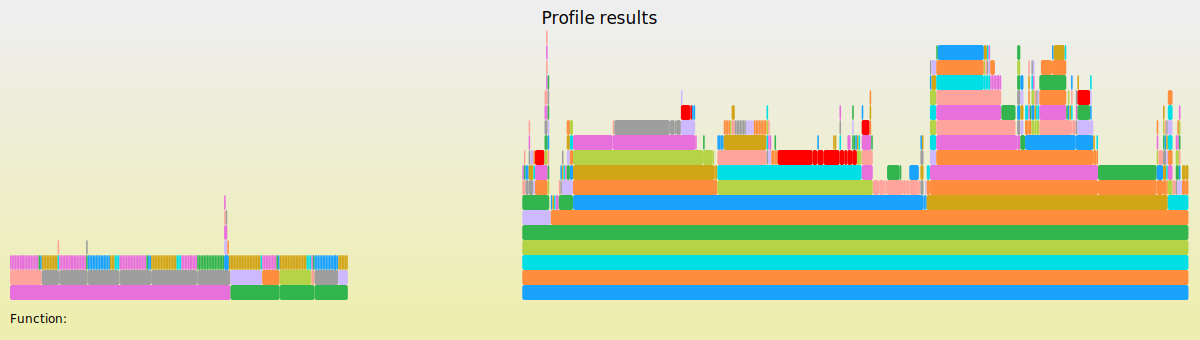

In [11]:
test_drawing()
Profile.clear()
@time @profile test_drawing()
ProfileView.view()